In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

heartdisease_df = pd.read_excel('cleveland.xlsx')

In [7]:
heartdisease_df.info()
#clusters = np.array([2 if x == 1 else 1 if x==0 else 0 for x in clusters])


heartdisease_df['num'] = np.array([1 if x == "positive" else 0 for x in heartdisease_df['num']])

heartdisease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 14 columns):
age         173 non-null float64
sex         173 non-null float64
cp          173 non-null float64
trestbps    173 non-null float64
chol        173 non-null float64
fbs         173 non-null float64
restecg     173 non-null float64
thalach     173 non-null float64
exang       173 non-null float64
oldpeak     173 non-null float64
slope       173 non-null float64
ca          173 non-null float64
thal        173 non-null float64
num         173 non-null object
dtypes: float64(13), object(1)
memory usage: 19.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 14 columns):
age         173 non-null float64
sex         173 non-null float64
cp          173 non-null float64
trestbps    173 non-null float64
chol        173 non-null float64
fbs         173 non-null float64
restecg     173 non-null float64
thalach     173 non-null float64
exang      

In [15]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)
# Olcumleyebılmek için cıft sayı yapmıstık kmean da , karsılastırma ıcın bunda da aynı seyı uyguluyorum
X=X.append(X.iloc[172],ignore_index=True,verify_integrity=True)
y[173]=y[172]

C:\Users\Mehtap_Labtop\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


In [31]:
# Yığınsal Kümelemenin COMPLETE ile Tanımlanması
agg_küme_co = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=2)

# Modeli Fit Etmek
kümeler_co = agg_küme_co.fit_predict(X_std)

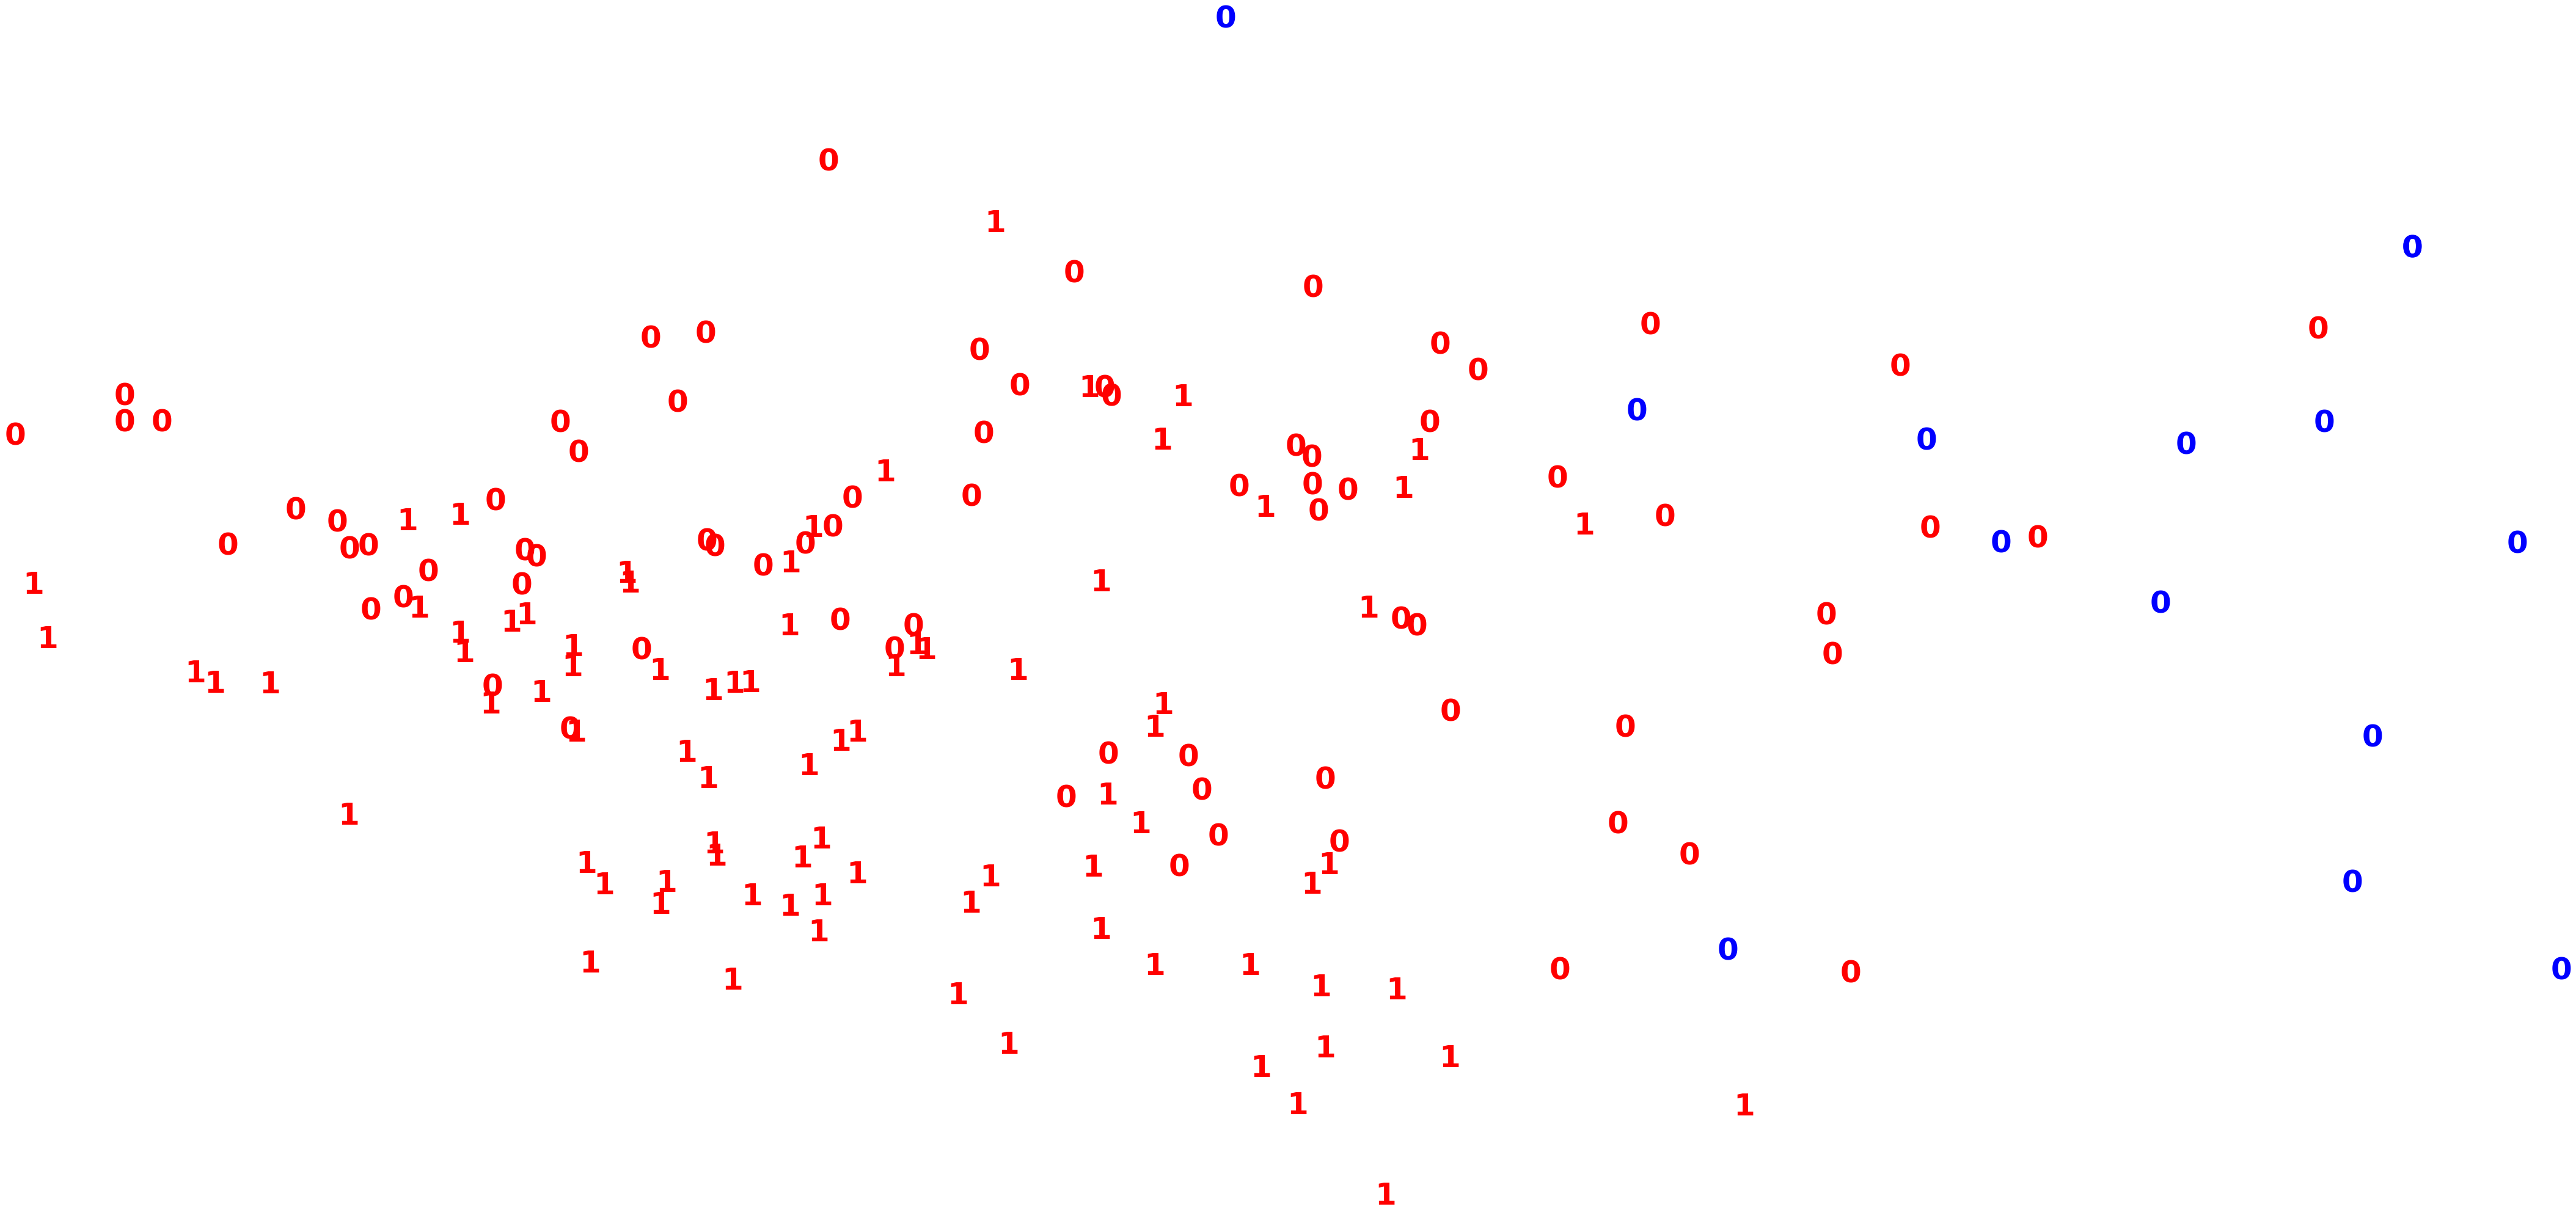

In [32]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(kümeler_co[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [33]:
metrics.adjusted_rand_score(y, kümeler_co)

0.0134747736093144

In [38]:
print(metrics.silhouette_score(X_std, kümeler_co, metric='cosine'))

0.09945379221552365


In [29]:
    
# Yığınsal Kümelemenin AVERAGE İLE Tanımlanması
agg_küme_av = AgglomerativeClustering(linkage='average', 
                                      affinity='cosine',
                                      n_clusters=2)

# Modeli Fit Etmek
kümeler_av = agg_küme_av.fit_predict(X_std)
    

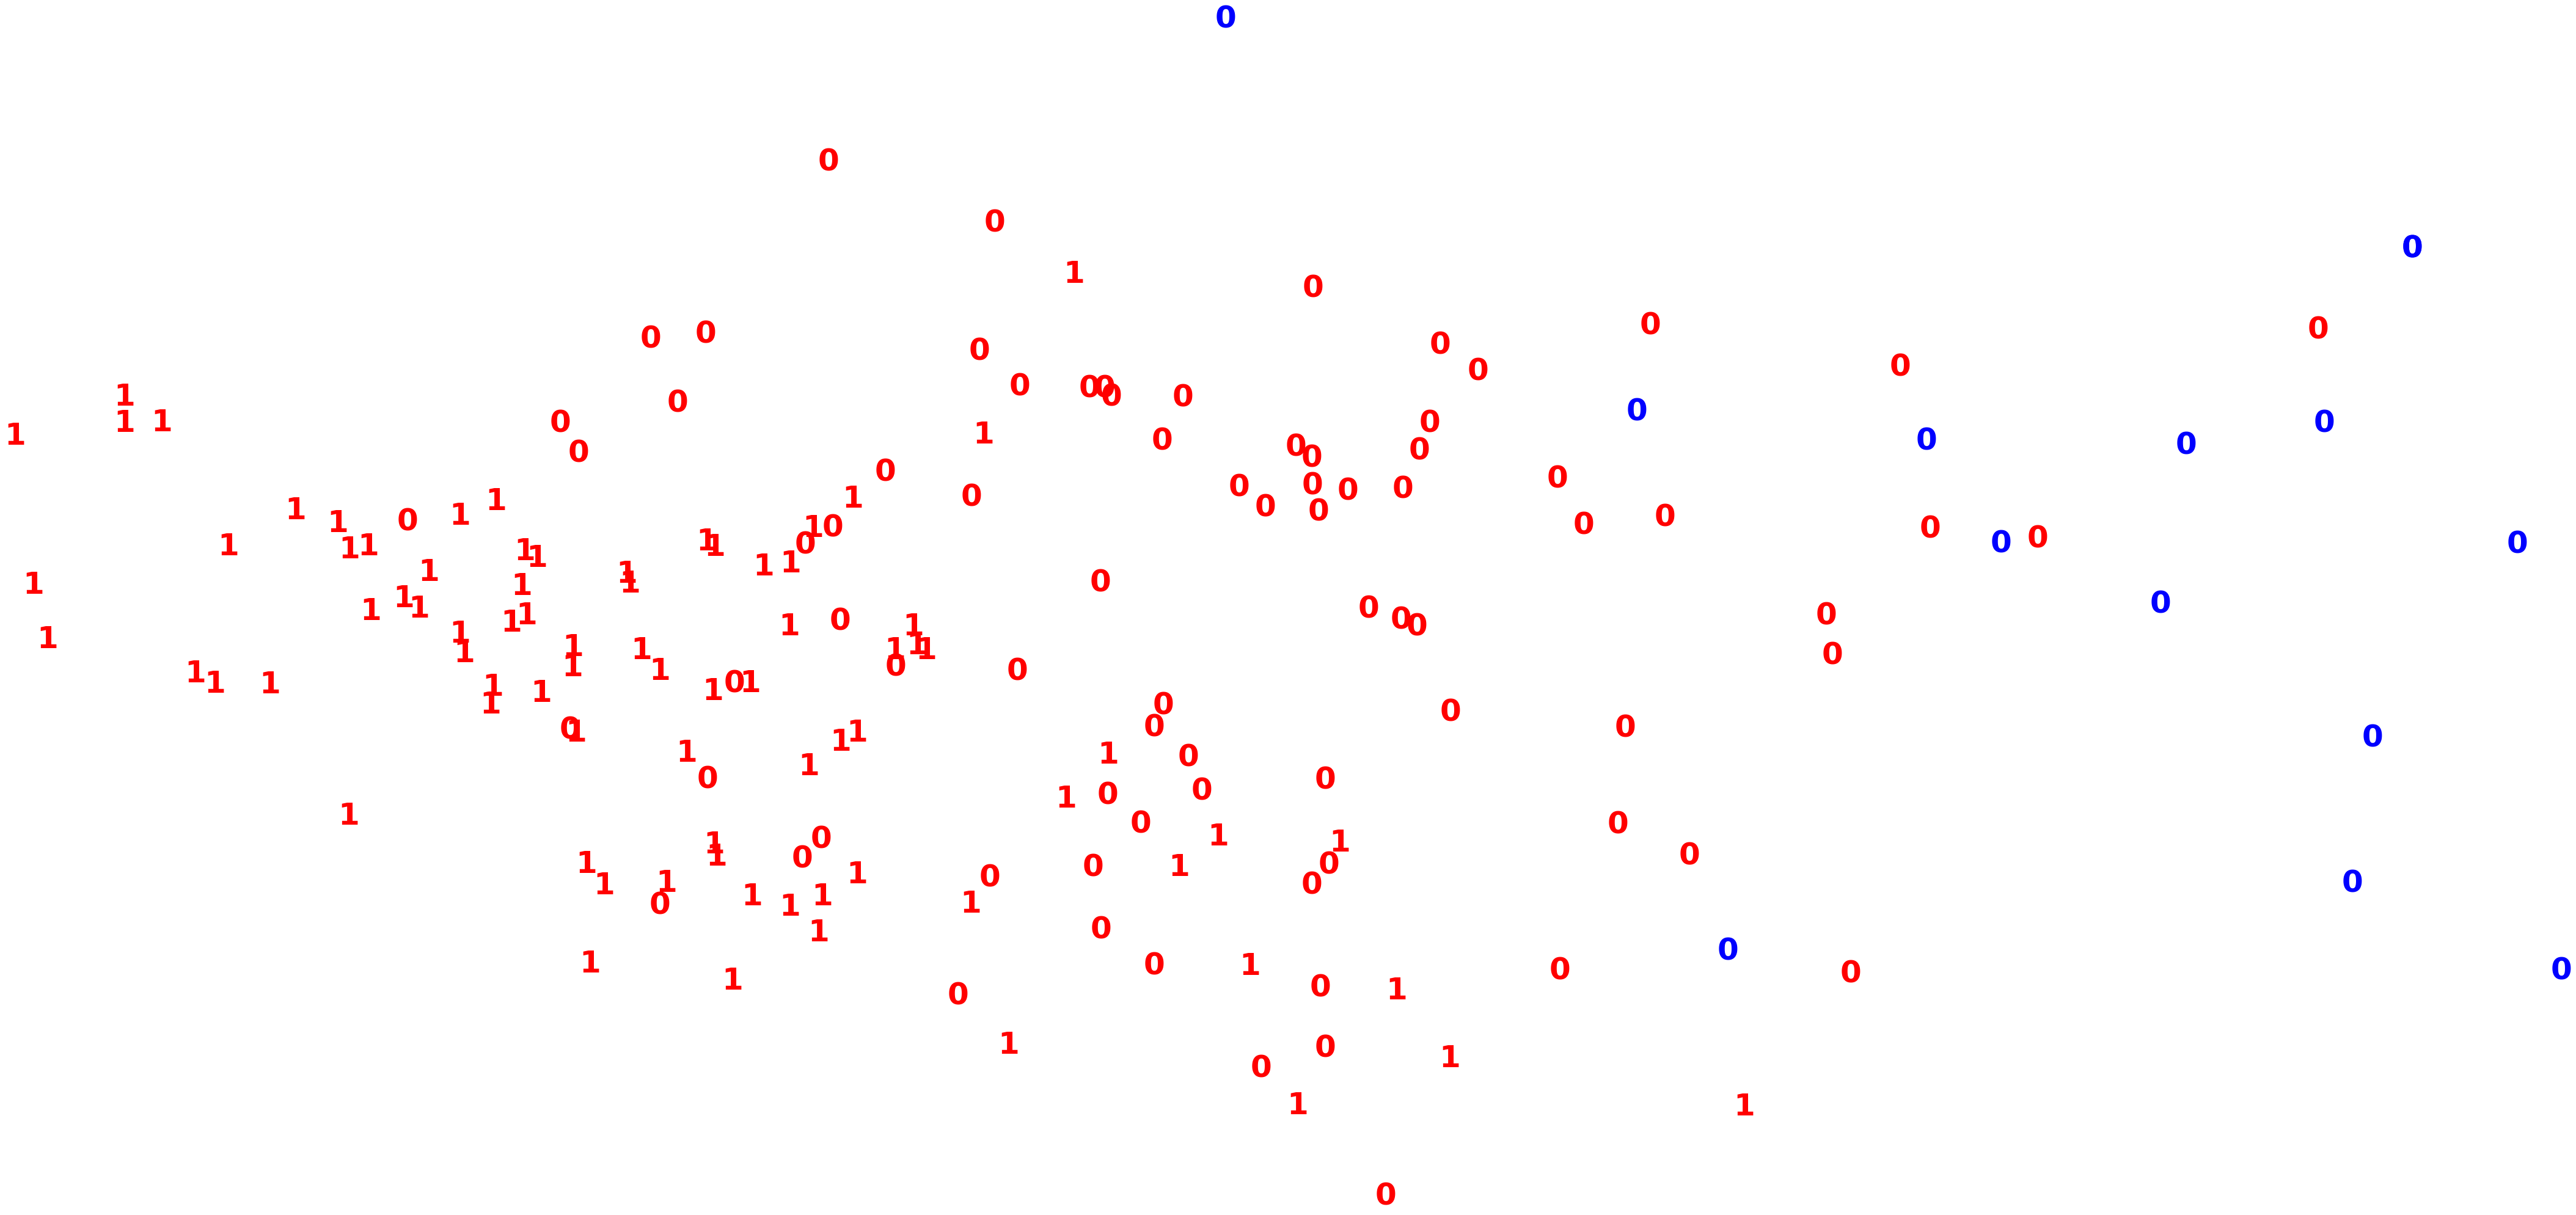

In [30]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(kümeler_av[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [34]:
metrics.adjusted_rand_score(y, kümeler_av)

0.003421641935531029

In [37]:
print(metrics.silhouette_score(X_std, kümeler_av, metric='cosine'))

0.18749837495616448


In [26]:
# Yığınsal Kümelemenin WARD İLE Tanımlanması 
agg_küme_w = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=2)

# Modeli Fit Etmek
kümeler_w = agg_küme_w.fit_predict(X_std)

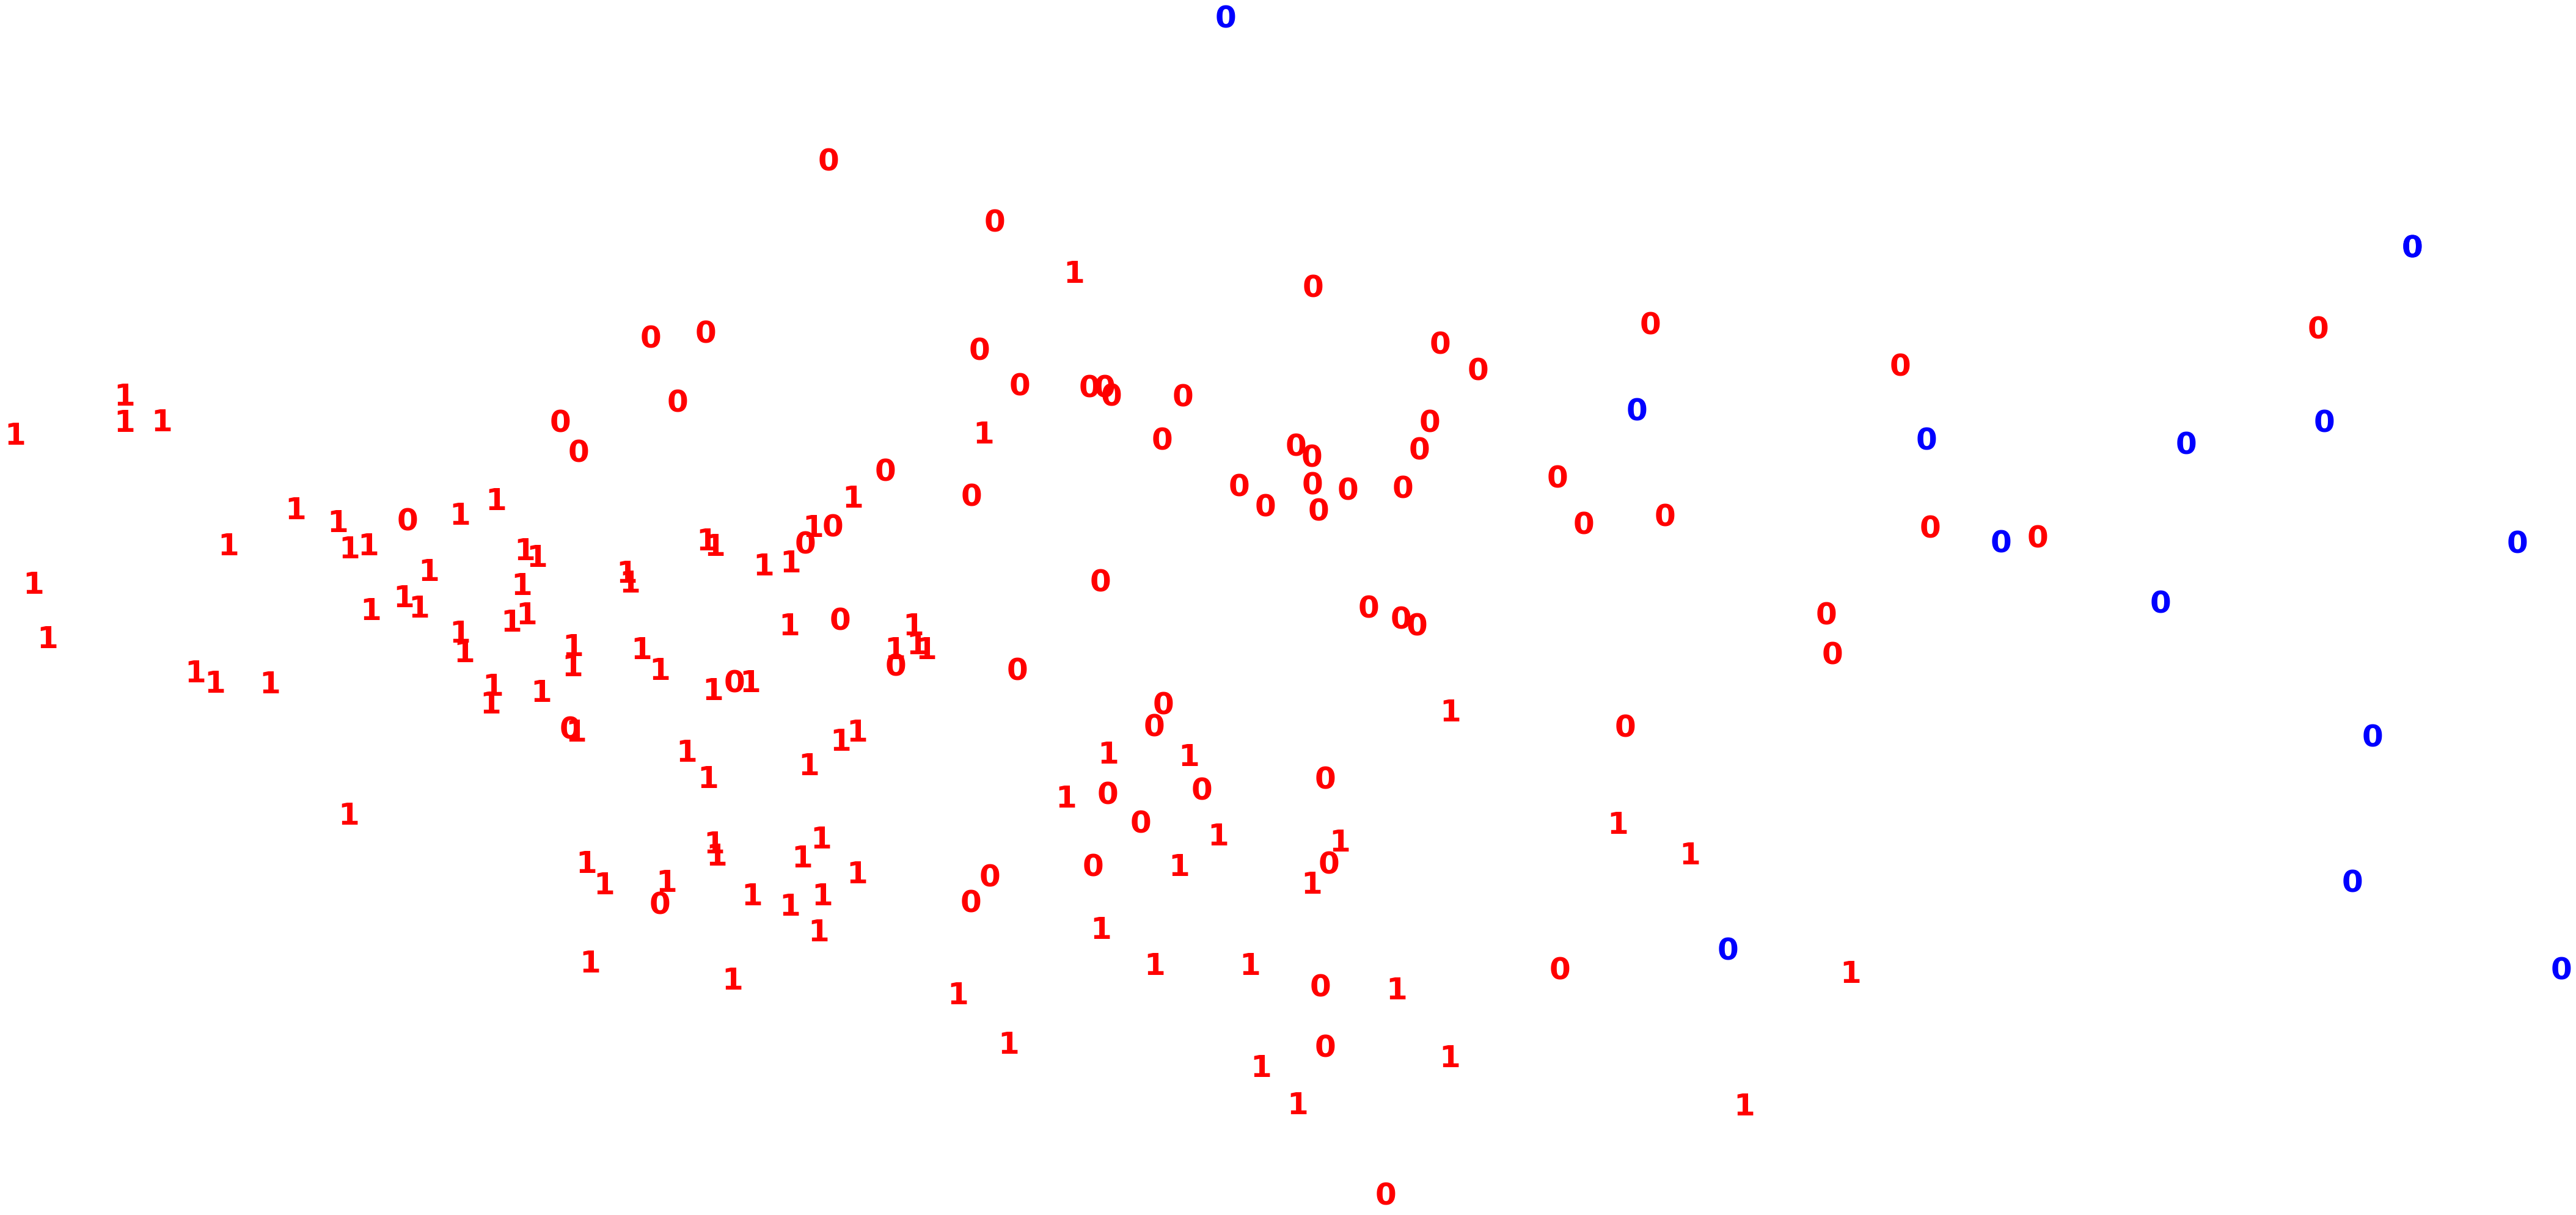

In [27]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(kümeler_w[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [35]:
metrics.adjusted_rand_score(y, kümeler_w)

0.04803860773295429

In [39]:
print(metrics.silhouette_score(X_std, kümeler_w, metric='euclidean'))

0.12418434817370079
